# Project 3

- Load (symmetric) TSP data from http://www.iwr.uni-heidelberg.de/groups/comopt/software/TSPLIB95/ 
  -> New link: http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/
- For opening the data use https://github.com/tsartsaris/TSPLIB-python-parser
- Apply the MMAS algorithm described in the exercise sheet

In [207]:
import numpy as np
import tsp_parser
import algorithms as algo
import viz
import utils
from matplotlib import pyplot as plt

%matplotlib inline

In [151]:
# Execute this if you want to changed the code within the python files
import imp
imp.reload(algo)
imp.reload(tsp_parser)
imp.reload(viz)

<module 'viz' from 'C:\\Users\\Thomas\\Documents\\Uni\\SS17\\nature-inspired\\project3\\viz.py'>

# Execute on gr24 problem

In [133]:
gr24_problem = tsp_parser.load_problem('data/gr24')

Stopped after 10.01 minutes


(1328,
 array([23, 11,  3,  0, 15, 10,  2, 17, 21, 16, 18, 14,  1, 19, 12,  8, 22,
        13,  9,  4, 20,  7,  6,  5]))

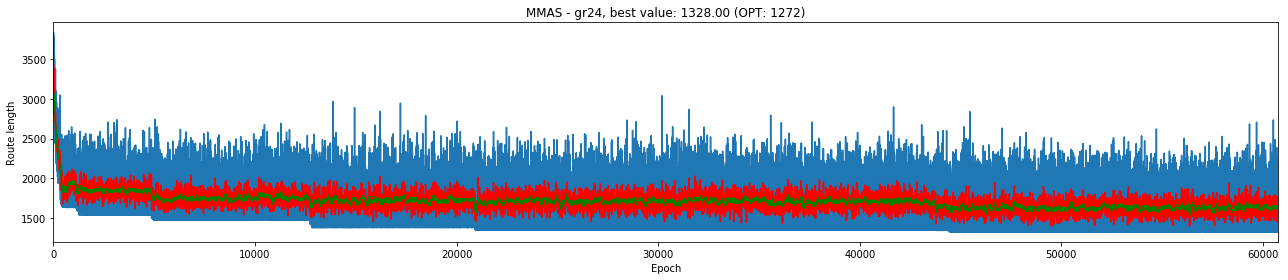

In [96]:
np.random.seed(0)  # Always produce the same random decisions (for debugging)
mmas = algo.MMAS(gr24_problem)
mmas()

Stopped after 0.74 minutes


(1272,
 array([ 7, 20,  4,  9, 16, 21, 17, 18, 14,  1, 19, 13, 12,  8, 22,  3, 11,
         0, 15, 10,  2,  6,  5, 23]))

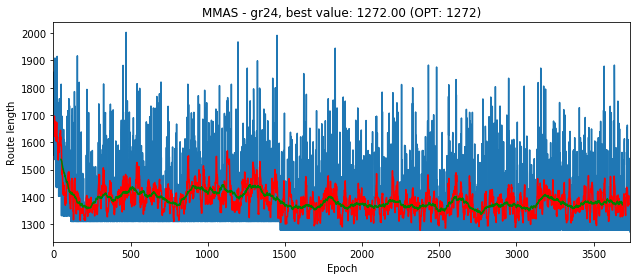

In [97]:
np.random.seed(0)
mmas = algo.MMAS(gr24_problem, wall_clock_time=10*60, beta=4)
mmas()

#### Results

Best solution: 1272  [ 16 11 3 7 6 24 8 21 5 10 17 22 18 19 15 2 20 14 13 9 23 4 12 1 ]

Our results (stopping after 10 minutes):
- Without heuristic information: 1328
- $\beta$ = 4:  1272  [ 7 20 4 9 16 21 17 18 14 1 19 13 12 8 22 3 11 0 15 10 2 6 5 23 ]

Conclusion:
- We found the same solution but shifted and with 0-based IDs
- Without $\beta$ we didn't find the solution within the 10 minutes. Using $\beta$ it took only ~45 seconds finding the optimal solution.

# Parameter tuning

alpha=0 beta=6 rho=0.0417 tau_min=0.0017 tau_max=23.9583


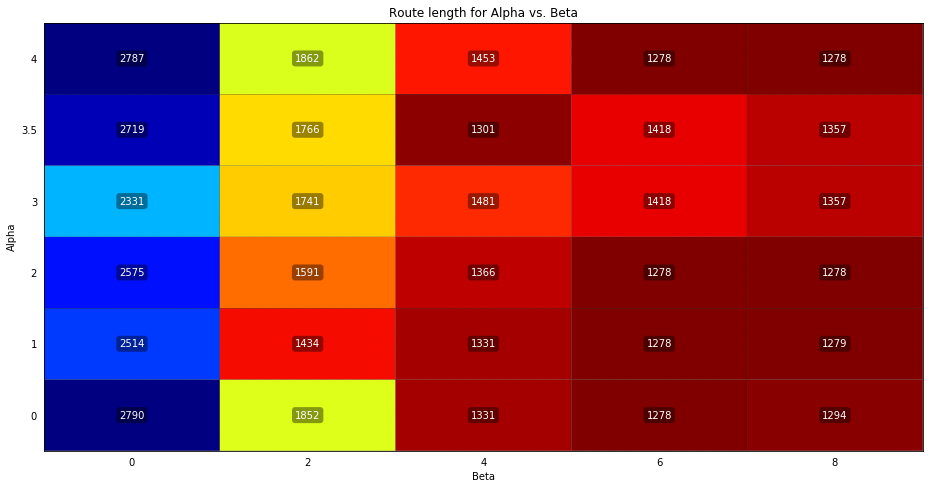

In [215]:
alphas=[0, 1, 2, 3, 3.5, 4]
betas=[0, 2, 4, 6, 8]
opt_params, costs = utils.grid_search(gr24_problem, alphas=alphas,
                                      betas=betas, runtime=1)
print('alpha={} beta={} rho={:.4f} tau_min={:.4f} tau_max={:.4f}'.format(*opt_params))
utils.plot_parameter_heatmap(costs, (alphas, 'Alpha'), (betas, 'Beta'))
opt_alpha = opt_params[0]
opt_beta = opt_params[1]

alpha=0 beta=6 rho=0.2000 tau_min=0.0017 tau_max=23.9583


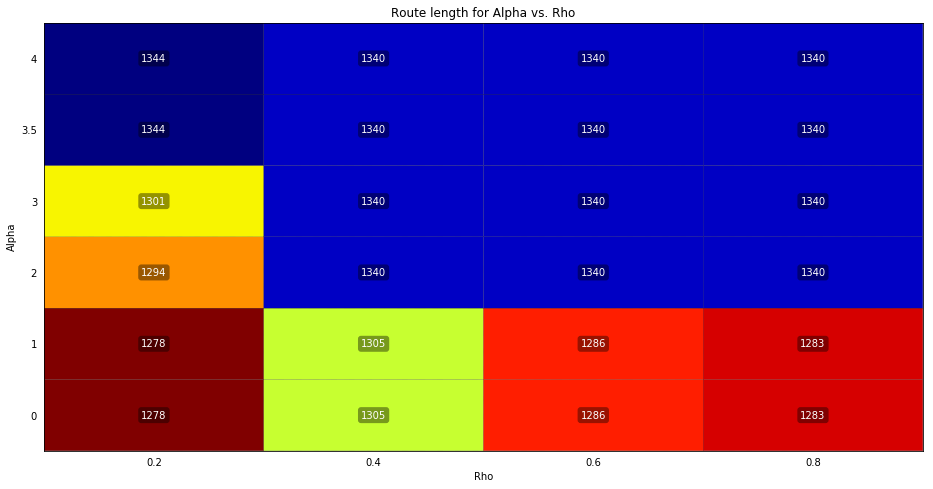

In [217]:
# TODO: Inspect tau_min, tau_max and rho (each with the best setting for alpha and beta?)
alphas=[0, 1, 2, 3, 3.5, 4]
n = gr24_problem['dimension']
rhos=[round(x, 4) for x in [0.5/n, 1/n, 2/n, 3/n, 4/n, 5/n]]
opt_params, costs = utils.grid_search(gr24_problem, alphas=alphas,
                                      betas=[opt_beta], rhos=rhos, runtime=1)
print('alpha={} beta={} rho={:.4f} tau_min={:.4f} tau_max={:.4f}'.format(*opt_params))
utils.plot_parameter_heatmap(costs, (alphas, 'Alpha'), (rhos, 'Rho'))

#### Conclusion (Parameter tuning)
- We executed the algorithm for each setting only for 1 second.
- This way we find the best parameters for finding a good solution as fast as possible.
- The performance of the algorithm strongly correlates with $\beta$. Good results always include a high value for $\beta$.
- Insights on tau_min, tau_max and rho?

# TODO: Everything below

### Different settings
    4.) "Test your algorithm on some small TSP-instances (from TSPLib, only symmetric instances). How large can the instances be so that your algorithm can still find a good solution which is only some percent above the Heuristic Optimization optimum? You may modify your algorithm as you like, for example by sending multiple ants each round and then choosing the best tour."
    5.) Document your strategies, your results and your resources used (“four cores at 2.3GHz for 24 hours. . . ”)"

### Test on different instances

In [ ]:
np.random.seed(0)  # Always produce the same random decisions
problem = tsp_parser.load_problem('data/gr24') # 1354
mmas = MMAS(problem, wall_clock_time=600, beta=4)
mmas()
# TODO: Also do the grid search on another instance

In [ ]:
'''
    Max-Mint Ant System for solving the traveling salesman problem
    Parameters:
        problem - parsed tsp containing adjacent matrix, optimal solution, etc.
    Optional values (given as keyword arguments):
        rho  (default: 1 / n)
        tau_min  (default: 1 / n**2)
        tau_max  (default: n - 1 / n)
        alpha  (default: 1)
        beta  (default: 0)
        wall_clock_time  (default: 600 [seconds])
'''
class Batch_MMAS(algo.MMAS):
    # TODO: Override functions if you want to add ants, etc.
    def __init__(self, problem, **kwargs):
        super.__init__(problem, **kwargs)

### Extra credits

    1.) "Solving an instance from TSPLib with at least 40 cities optimally;"
    2.) "Solving an instance from TSPLib with at least 100 cities at most 1% worse than the optimum tour length;"
    3.) "Solving an instance from TSPLib with at least 1000 cities at most 30% worse than the optimum tour length;"
    4.) "Being the team which solved the highest-number-of-cities instance from TSPLib at most 50% worse than the optimum tour length."

"You might need to tune your algorithms some to make them good enough for these
extra credit items (and there is no time limit on these). Feel free to google for ideas
for how to improve ACO algorithms (I can recommend the paper by Stützle and Hoos
from 2000, Max-Min Ant System). Document your strategies, your results and your
resources used (“four cores at 2.3GHz for 24 hours. . . ”)."